Problem Set 3 
Lihe Liu

In [ ]:
### 1. to find the highest value in line-by-line style 
#open the input file(skip the first line aka. col-names) and set starting value 0.0 for storage 
data =  open("/Users/liulihe95/Desktop/CourseFall2018/CompTools/CO-OPS__8729108__wl.csv", 'r')
maxvalue = 0.0
next(data)
## for the loop, parse every line and then compare the water level record with the temporary "max", if bigger, replace
for level in data:
    date=level.strip().split(",")[0] # select the date record
    waterlevel=level.strip().split(",")[1] # select the water level record
    #try --- skip empty values
    try:
        waterlevel = float(waterlevel)
    #continue even if non-float values show up
    except:
        continue 
    if waterlevel > maxvalue:
        maxvalue=float(waterlevel) #store the temporary highest value in the starting value
        maxdate=date # take the date of corresponding highest water level
## print the results in an organized way
print('Date_and_time: ', maxdate,'\nHighest_water_level: ' ,maxvalue)

Date_and_time:  2018-10-10 18:06 
Highest_water_level:  6.647

In [190]:
### 2. to find the highest value using pandas
## import, organize and check dataset structure
import pandas as pd
data=pd.read_csv("/Users/liulihe95/Desktop/CourseFall2018/CompTools/CO-OPS__8729108__wl.csv")
data.columns = ['Date Time','Water Level','Sigma','O','F','R','L','Quality']
data.dropna() #remove NA
data.shape
## using .max and .idxmax mthods to find the max value and the correspoding index of that records, then print the output in an orgnized way
print('Date_and_time: ',data['Date Time'][data['Water Level'].idxmax()],'\nHighest_water_level: ', data['Water Level'].max())

Date_and_time:  2018-10-10 18:06 
Highest_water_level:  6.647


Date_and_time:  2018-10-10 18:06 
Highest_water_level:  6.647

In [191]:
###3. use .shift method - get the diff of continuous two lines and then sort
# use shift to move every line downwards by 1 and do substractions
data['shift'] = data["Water Level"].shift(1)
# add the differances to the dataset as a new columm (to be sorted)
data['diff'] = data['Water Level'] - data["shift"]
# print the results in an organized way
print('The fastest rise in water level happened during the time span-',data['Date Time'][data['diff'].idxmax()-1],'to',data['Date Time'][data['diff'].idxmax()],', water level changed from',round(data['Water Level'][data['diff'].idxmax()-1],4),'to',round(data['Water Level'][data['diff'].idxmax()],4), ', the range was',round(data['diff'].max(),4),'.')


The fastest rise in water level happened during the time span- 2018-10-10 17:36 to 2018-10-10 17:42 , water level changed from 4.951 to 5.591 , the range was 0.64 .


The fastest rise in water level happened during the time span- 2018-10-10 17:36 to 2018-10-10 17:42 , water level changed from 4.951 to 5.591 , the range was 0.64 .

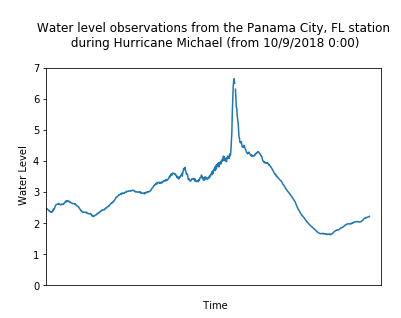

In [179]:
###4. plot - water level over time using matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
#import dataset
Table = pd.read_csv("/Users/liulihe95/Desktop/CourseFall2018/CompTools/CO-OPS__8729108__wl.csv") #reads through csv and puts into a table 
Table.columns = ['Date Time','Water Level','Sigma','O','F','R','L','Quality']
Table.dropna()
wl = Table['Water Level']
time = Table['Date Time']
# set paramaters
plt.plot(time, wl, '-')
plt.axis([0, 750, 0, 7])
plt.xlabel('\n Time') # label of x
plt.ylabel('\n Water Level') # label of y
#set title
plt.title('\n Water level observations from the Panama City, FL station \n during Hurricane Michael (from 10/9/2018 0:00)\n')
plt.tick_params(
    axis='x', # make changes to x
    which='both',#both major and minor ticks will be affected
    bottom=False,#removes x axis tick marks
    top=False,#removes x axis ticks along the top
    labelbottom=False)
plt.show()

In [192]:
## acquire info with url and write to a file
import urllib.request, urllib.parse, urllib.error
import datetime as dt
import requests
# set url for data acquire and set up parameters
serviceurl = 'https://tidesandcurrents.noaa.gov/api/datagetter?'
id="8729108"
units="english"
timezone="GMT"
datum="MLLW"
product="water_level"
application="NOS.COOPS.TAC.WL"
format="csv"
#open a output file
output=open("Water_Level_Today.csv", "w+")
url = serviceurl +\
      urllib.parse.urlencode({"station":id,
                                "time_zone":timezone,
                                "datum":datum,
                                "product":product,
                                "application": application,
                                "units":units,
                                "format": "csv",
                                "date":"today"
                               })
print('Water level data file from Panama City, Fl has been downloaded, which can also be accessed in:\n',url,'\n') #report url
response = requests.get(url)

if response.status_code != 200:
    print('Failed to get data:', response.status_code)
else:
    print(response.text[:100])
    output.write(response.text)

#Output file closed
output.close()

Water level data file from Panama City, Fl has been downloaded, which can also be accessed in:
 https://tidesandcurrents.noaa.gov/api/datagetter?station=8729108&time_zone=GMT&datum=MLLW&product=water_level&application=NOS.COOPS.TAC.WL&units=english&format=csv&date=today 

Date Time, Water Level, Sigma, O, F, R, L, Quality 
2018-11-18 00:00,0.860,0.003,0,0,0,0,p
2018-11-1


Water level data file from Panama City, Fl has been downloaded, which can also be accessed in:
 https://tidesandcurrents.noaa.gov/api/datagetter?station=8729108&time_zone=GMT&datum=MLLW&product=water_level&application=NOS.COOPS.TAC.WL&units=english&format=csv&date=today 

Date Time, Water Level, Sigma, O, F, R, L, Quality 
2018-11-18 00:00,0.860,0.003,0,0,0,0,p
2018-11-1